# **SDA PROJECT**

# **Diabetes Detection**

Made By:
    - Aadi Krishna Vikram (211020402) 
    - Ashish Agrawal (211020414)

# **Importing Required Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# **DATASET** 

In [ ]:
df = pd.read_csv('diabetes2.csv')

In [ ]:
# To view the entire dataset from here

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)


In [ ]:
df.head(-1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# The number of rows and columns in the dataset
n = df.shape[0]
df.shape


(768, 9)

In [ ]:
# Atribute's datatypes 

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Removing Zero Values**

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no Null Values **BUT..**

In [ ]:
# Number of useless 0 values

print("Number of 0's for Glucose:", df['Glucose'].isin([0]).sum())
print("Number of 0's for Blood Pressure:", df['BloodPressure'].isin([0]).sum())
print("Number of 0's for Skin Thickness:", df['SkinThickness'].isin([0]).sum())
print("Number of 0's for Insulin:", df['Insulin'].isin([0]).sum())
print("Number of 0's for BMI:", df['BMI'].isin([0]).sum())

Number of 0's for Glucose: 5
Number of 0's for Blood Pressure: 35
Number of 0's for Skin Thickness: 227
Number of 0's for Insulin: 374
Number of 0's for BMI: 11


In [ ]:
# Percentage of 0 values

glucose = df['Glucose'].isin([0]).sum() / n*100
print("Percentage of missing data for Glocuse: {:.2f} %".format(glucose))

bloodpressure = df['BloodPressure'].isin([0]).sum() / n*100
print("Percentage of missing data for Blood Pressure: {:.2f} %".format(bloodpressure))

skinthickness = df['SkinThickness'].isin([0]).sum() / n*100
print("Percentage of missing data for Skin Thickness: {:.2f} %".format(skinthickness))

insulin = df['Insulin'].isin([0]).sum() / n*100
print("Percentage of missing data for Insulin: {:.2f} %".format(insulin))

bmi = df['BMI'].isin([0]).sum() / n*100
print("Percentage of missing data for BMI: {:.2f} %".format(bmi))


# We can see we are missing between 0.65%-48.6% of data for these variables, even though the isnull function showed us no 
# missing data as NaN

Percentage of missing data for Glocuse: 0.65 %
Percentage of missing data for Blood Pressure: 4.56 %
Percentage of missing data for Skin Thickness: 29.56 %
Percentage of missing data for Insulin: 48.70 %
Percentage of missing data for BMI: 1.43 %


# **MEAN IMPUTATION**

In [ ]:
# Making a copy of dataset

df_clean = df.copy()


In [ ]:
# Replacing 0 values in these columns with their mean values

df_clean['Glucose'] = df_clean['Glucose'].replace(0,df['Glucose'].mean())
df_clean['BloodPressure'] = df_clean['BloodPressure'].replace(0,df['BloodPressure'].mean())
df_clean['SkinThickness'] = df_clean['SkinThickness'].replace(0,df['SkinThickness'].mean())
df_clean['Insulin'] = df_clean['Insulin'].replace(0,df['Insulin'].mean())
df_clean['BMI'] = df_clean['BMI'].replace(0,df['BMI'].mean())



# **BEFORE vs AFTER**

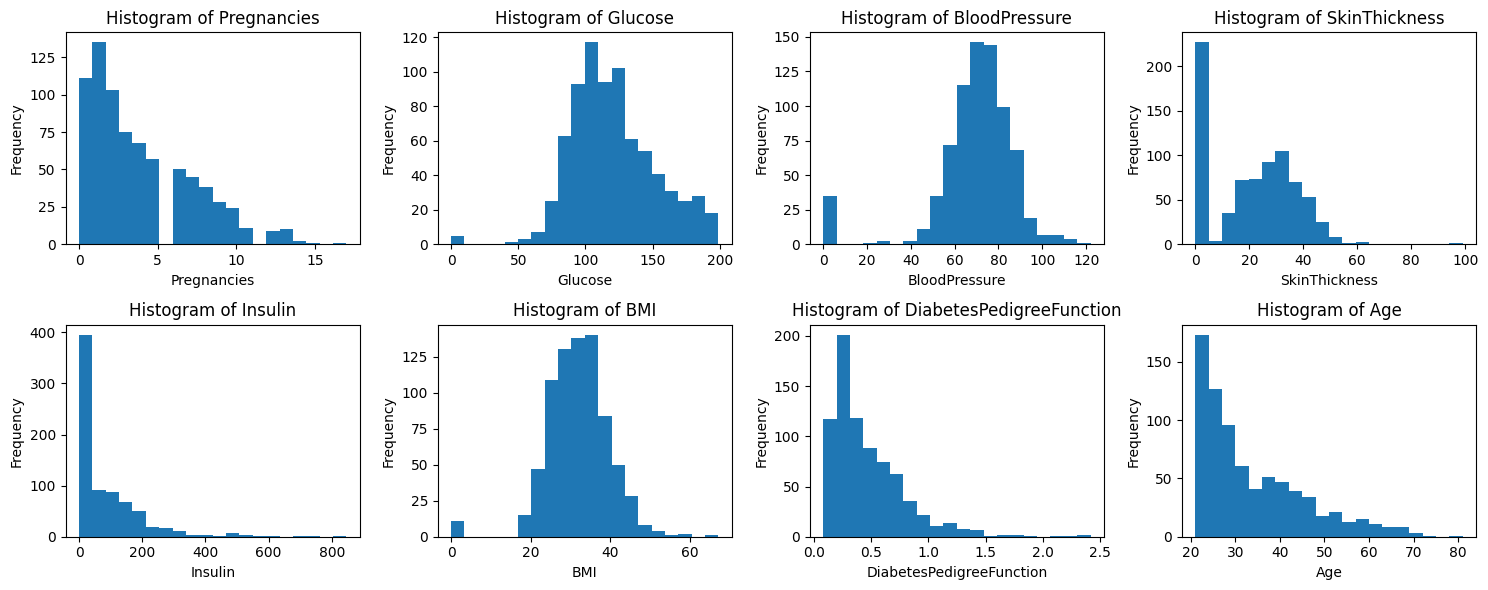

In [207]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
for i, ax in enumerate(axes.flatten()):
    if i < len(df.columns):
        col = df.columns[i]
        ax.hist(df[col], bins=20)
        ax.set_title('Histogram of {}'.format(col))
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# **AFTER REMOVING**

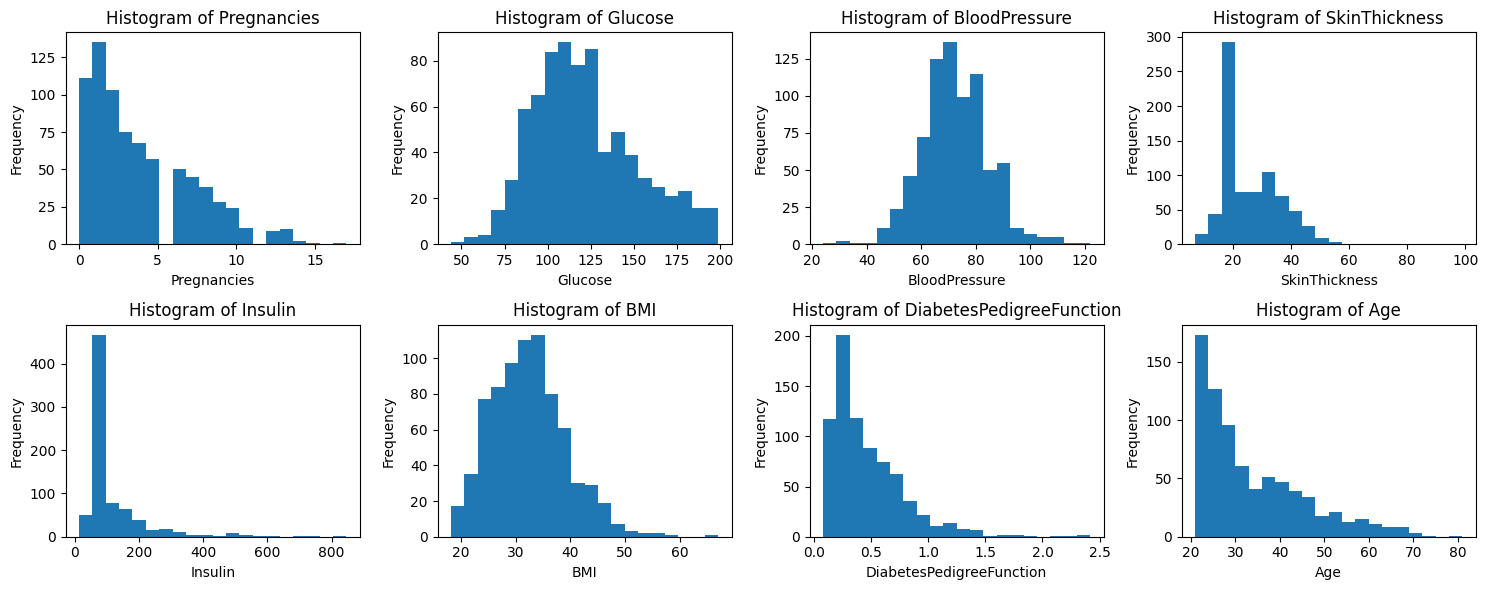

In [208]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
for i, ax in enumerate(axes.flatten()):
    if i < len(df_clean.columns):
        col = df_clean.columns[i]
        ax.hist(df_clean[col], bins=20)
        ax.set_title('Histogram of {}'.format(col))
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

As we can see, all zeroes are processed

In [ ]:
# Description of Clean DATA
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Correlation Between Attributes**

In [ ]:
df_clean.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<Axes: >

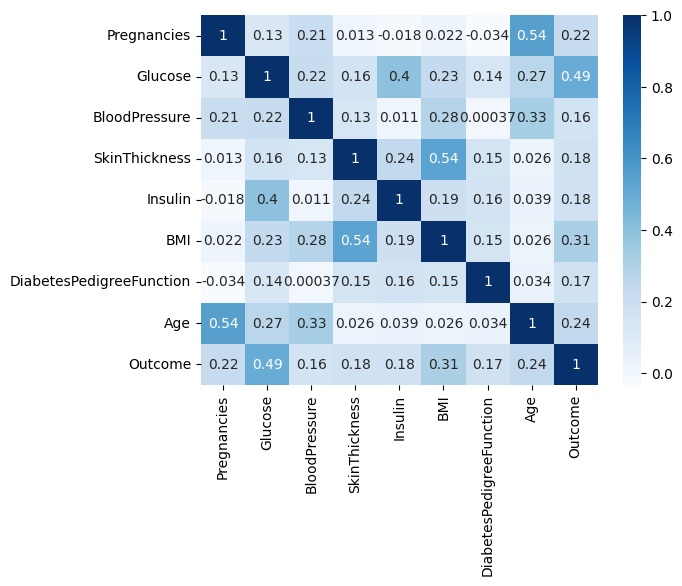

In [ ]:
# HEATMAP of Correlation between attributes
sns.heatmap(df_clean.corr(),annot=True, cmap='Blues')

In [ ]:
# Target Variable
x = df_clean.drop('Outcome',axis=1)
y = df_clean['Outcome']

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logmodel.predict(x_test)
 

MODEL'S **Coefficients and Intercept**

In [ ]:
print("MODEL'S Intercept  = ", logmodel.intercept_)

MODEL'S Intercept  =  [-5.87699593]


In [209]:

coeffs_df_clean = pd.DataFrame(list(zip(df_clean.columns, logmodel.coef_[0])),
                         columns=['Feature', 'Coefficient'])

coeffs_df_clean

,Feature,Coefficient
0,Pregnancies,0.125443
1,Glucose,0.032373
2,BloodPressure,-0.030605
3,SkinThickness,-0.003872
4,Insulin,-0.000729
5,BMI,0.057656
6,DiabetesPedigreeFunction,2.108056
7,Age,0.007700


In [ ]:
from sklearn import metrics as metrics
from sklearn.metrics import confusion_matrix


# **EVALUATION METRICES**

In [ ]:
cols = ['PRECISION','RECALL', 'ACCURACY']
vals = [metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred),
        metrics.accuracy_score(y_test,y_pred)]

pd.DataFrame(list(zip(cols, vals)), columns=['Metric', 'Value'])

,Metric,Value
0,PRECISION,0.738462
1,RECALL,0.592593
2,ACCURACY,0.783550


# **Confusion Matrix**

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix

array([[133,  17],
       [ 33,  48]])

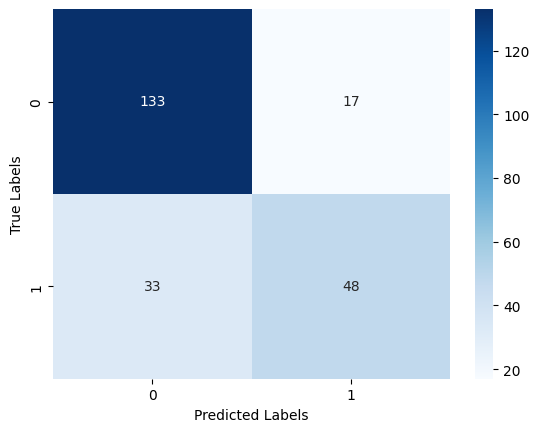

In [ ]:
sns.heatmap(cf_matrix,annot=True,cmap='Blues',fmt = 'g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **LINEAR REGRESSION**



Between Glucose and Outcome 

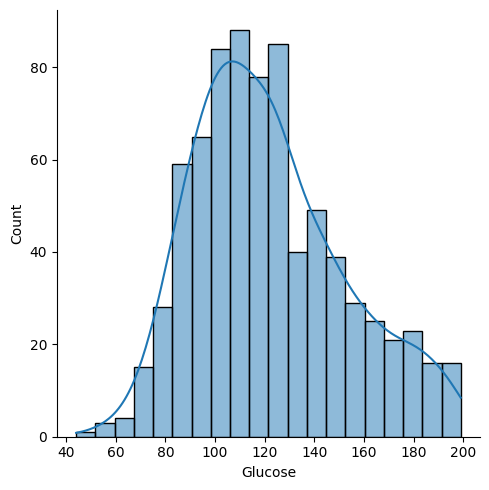

In [ ]:
# Glucose Values
sns.displot(df_clean['Glucose'], kde=True, bins=20)

already normally distributed

In [ ]:
x1 = df_clean['Glucose'].values.reshape(-1, 1)
y1 = df_clean['Outcome'].values.reshape(-1, 1)


regressor = LinearRegression()
regressor.fit(x1, y1)


LinearRegression()

**Coefficient and Intercepts**

In [ ]:
print('Coefficient:', regressor.coef_[0][0])
print('Y-intercept:', regressor.intercept_[0])

Coefficient: 0.0077241829537835855
Y-intercept: -0.5909326459601292


Plot of Linear Regression line

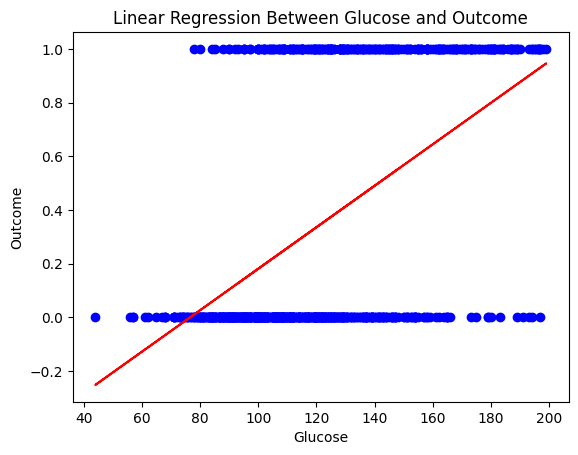

In [ ]:
plt.scatter(x1, y1, color='blue')

# Plot the regression line
plt.plot(x1, regressor.predict(x1), color='red')

# Add axis labels and a title to the plot
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title('Linear Regression Between Glucose and Outcome')

plt.show()

That's why we used Logistic Regression